### EDA

In [2]:
import pandas as pd

e = pd.read_csv('exercise.csv')
c = pd.read_csv('calories.csv')

In [3]:
e.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
c.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
w = pd.concat([e,c['Calories']], axis = 1)
w

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [7]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
w['Gender'].unique()

array(['male', 'female'], dtype=object)

In [9]:
w.replace({'Gender': {'male':0, 'female':1}}, inplace = True)

In [10]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [11]:
c = w.drop('User_ID', axis = 1)

### Data Visualization

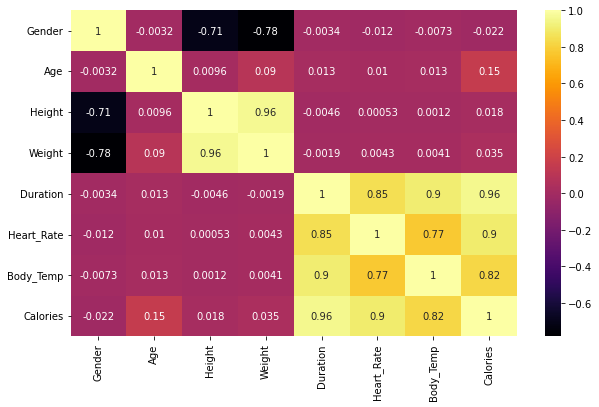

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

v = c.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(v, annot = True, cmap = 'inferno');

In [16]:
abs(v['Calories']).sort_values(ascending = False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
Name: Calories, dtype: float64

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


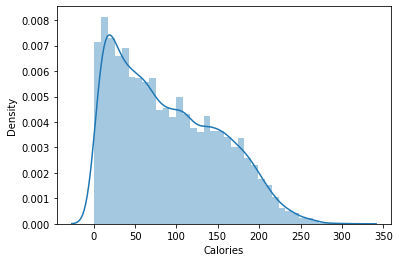

In [20]:
sns.distplot(c['Calories']);

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


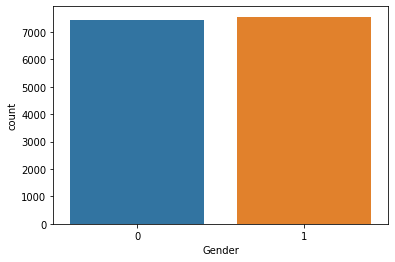

In [21]:
sns.countplot(c['Gender']);

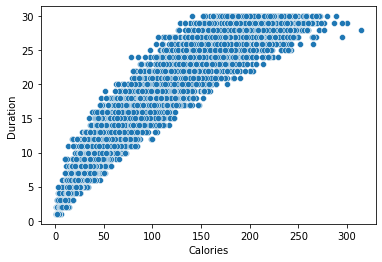

In [28]:
sns.scatterplot(x = 'Calories', y = 'Duration', data = c);

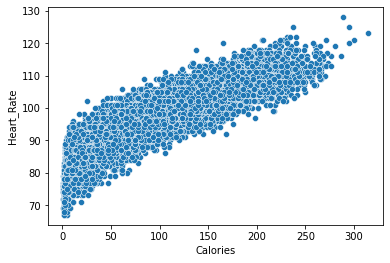

In [24]:
sns.scatterplot(x = 'Calories', y = 'Heart_Rate', data = c);

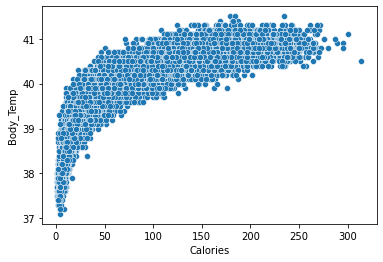

In [31]:
sns.scatterplot(x = 'Calories', y = 'Body_Temp', data = c);

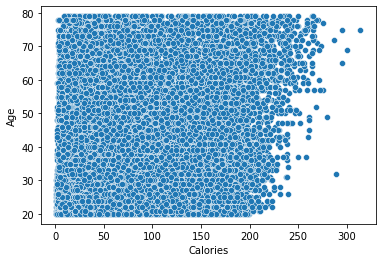

In [32]:
sns.scatterplot(x = 'Calories', y = 'Age', data = c);

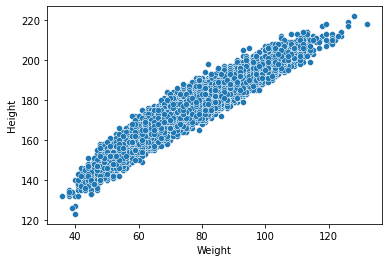

In [33]:
sns.scatterplot(x = 'Weight', y = 'Height', data = c);

### Model

In [34]:
X = c.drop('Calories', axis = 1)
y = c['Calories']

In [35]:
from sklearn.model_selection import train_test_split

a,d,s,f = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [37]:
print(a.shape, s.shape, d.shape, f.shape)

(12000, 7) (12000,) (3000, 7) (3000,)


In [41]:
from xgboost import XGBRegressor

m = XGBRegressor()
m.fit(a,s)
g = m.predict(d)

In [42]:
from sklearn.metrics import mean_absolute_error

print('MAE : ', mean_absolute_error(f,g))

MAE :  1.5567490382989249


### Prediction

In [46]:
n = (1,20,166.0,60.0,14.0,94.0,40.3)

import numpy as np
n = np.array(n)
n = n.reshape(1,-1)
m.predict(n)

array([67.170525], dtype=float32)